<a href="https://colab.research.google.com/github/Niranjanasnair/task5-text-classification/blob/main/Data_Science_Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from datetime import datetime

print("Name: Niranjana S")
print("Date & Time:", datetime.now().strftime("%Y-%m-%d %H:%M:%S"))


Name: Niranjana S
Date & Time: 2025-10-20 12:10:42


In [3]:
import pandas as pd

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns
import re
import string

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC


In [7]:
from datetime import datetime

print("Name: Niranjana S")
print("Date & Time:", datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
from google.colab import files
files.upload()


Name: Niranjana S
Date & Time: 2025-10-20 12:10:58


Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"niranjanasnair","key":"24fabd0f2c1c4dcf7cc654f88c7512a6"}'}

In [8]:
!mkdir -p ~/.kaggle
!cp "kaggle (1).json" ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json


In [9]:
from datetime import datetime

print("Name: Niranjana S")
print("Date & Time:", datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
from google.colab import files
uploaded = files.upload()


Name: Niranjana S
Date & Time: 2025-10-20 12:11:17


Saving archive.zip to archive.zip


In [10]:
from datetime import datetime

print("Name: Niranjana S")
print("Date & Time:", datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
import zipfile
import os

# Unzip into a folder named 'consumer_complaint_data'
with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
    zip_ref.extractall('consumer_complaint_data')

# Check the extracted files
os.listdir('consumer_complaint_data')


Name: Niranjana S
Date & Time: 2025-10-20 12:40:57


['rows.csv']

In [11]:
df = pd.read_csv('consumer_complaint_data/rows.csv', low_memory=False)
print(df.columns)


Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')


In [12]:
# Keep only relevant columns and drop missing values
df = df[['Consumer complaint narrative', 'Product']].dropna()

# Rename columns for consistency
df.columns = ['consumer_complaint_narrative', 'product']

# Map categories to numeric labels
mapping = {
    'Credit reporting, repair, or other': 0,
    'Debt collection': 1,
    'Consumer Loan': 2,
    'Mortgage': 3
}

df = df[df['product'].isin(mapping.keys())]  # keep only relevant categories
df['label'] = df['product'].map(mapping)

# Text cleaning function
import re, string

def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r'\d+', '', text)  # remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    text = re.sub(r'\s+', ' ', text)  # remove extra spaces
    return text

# Apply text cleaning
df['clean_text'] = df['consumer_complaint_narrative'].apply(clean_text)

df.head()


,consumer_complaint_narrative,product,label,clean_text
34357,i never received anything stating that i owed ...,Debt collection,1,i never received anything stating that i owed ...
35079,Starting in XX/XX/XXXX I started receiving cal...,Debt collection,1,starting in xxxxxxxx i started receiving calls...
35265,YOUR COMPLAINT I am disputing the debt owed to...,Debt collection,1,your complaint i am disputing the debt owed to...
35946,XX/XX/XXXX - called Rushmore Loan Management S...,Debt collection,1,xxxxxxxx called rushmore loan management servi...
36345,About mid-XXXX a door to door salesman came an...,Debt collection,1,about midxxxx a door to door salesman came and...



Naive Bayes Model Results:
Accuracy: 0.9301826713591419
              precision    recall  f1-score   support

           1       0.94      0.96      0.95     17367
           2       0.86      0.44      0.58      1887
           3       0.92      0.97      0.94     10581

    accuracy                           0.93     29835
   macro avg       0.91      0.79      0.82     29835
weighted avg       0.93      0.93      0.92     29835


Logistic Regression Model Results:
Accuracy: 0.9484833249539132
              precision    recall  f1-score   support

           1       0.95      0.97      0.96     17367
           2       0.82      0.66      0.73      1887
           3       0.96      0.97      0.96     10581

    accuracy                           0.95     29835
   macro avg       0.91      0.86      0.88     29835
weighted avg       0.95      0.95      0.95     29835


Linear SVM Model Results:
Accuracy: 0.9477124183006536
              precision    recall  f1-score   support

     

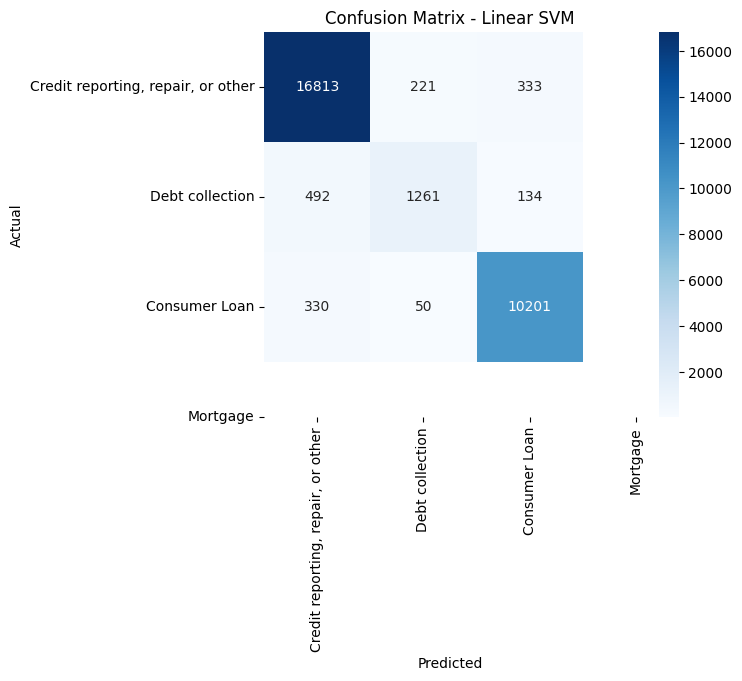

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    df['clean_text'], df['label'], test_size=0.2, random_state=42
)

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Define models
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Linear SVM": LinearSVC()
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    print(f"\n{name} Model Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

# Confusion matrix for the best model (example: Linear SVM)
best_model = LinearSVC()
best_model.fit(X_train_tfidf, y_train)
y_pred = best_model.predict(X_test_tfidf)

conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=mapping.keys(), yticklabels=mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Linear SVM")
plt.show()


In [14]:
# Sample new complaints
new_complaints = [
    "I am being called repeatedly by a debt collection agency.",
    "My mortgage application was rejected without explanation.",
    "I have issues with my credit report not updating correctly."
]

# Transform using TF-IDF
new_tfidf = vectorizer.transform(new_complaints)

# Predict categories
predictions = best_model.predict(new_tfidf)

# Map back to category names
reverse_mapping = {v:k for k,v in mapping.items()}
predicted_categories = [reverse_mapping[p] for p in predictions]

for text, cat in zip(new_complaints, predicted_categories):
    print(f"Complaint: {text}\nPredicted Category: {cat}\n")


Complaint: I am being called repeatedly by a debt collection agency.
Predicted Category: Debt collection

Complaint: My mortgage application was rejected without explanation.
Predicted Category: Mortgage

Complaint: I have issues with my credit report not updating correctly.
Predicted Category: Mortgage

